# Lecture 2: practical exercises.

### 1. Implement convolve and convolve_same function below


In [1]:
import numpy as np

In [2]:
def convolve(image, kernel):
    assert image.ndim == kernel.ndim == 2
    
    kernel = np.flip(kernel, axis=range(kernel.ndim))
    shape = np.array(image.shape) - kernel.shape + 1
    result = np.empty(shape, dtype=float) # we'll keep things simple and always return float
    h, w = kernel.shape
        
    for i, j in np.ndindex(*shape):
        result[i, j] = (image[i:i + h, j:j + w] * kernel).sum()

    return result


# a more general version, but much slower than `convolve`
def convolve_nd(image, kernel):
    assert image.ndim == kernel.ndim
    
    kernel = np.flip(kernel, axis=range(kernel.ndim))
    shape = np.array(image.shape) - kernel.shape + 1
    result = np.empty(shape, dtype=image.dtype)
        
    for start in np.ndindex(*shape):
        stop = np.array(start) + kernel.shape
        slices = tuple(
            slice(x, y) for x, y in zip(start, stop)
        )
        result[start] = (image[slices] * kernel).sum()

    return result

    
def convolve_same(image, kernel):
    # pad image before convolution to obtain same resulting shape
    delta = np.array(kernel.shape) - 1
    # left and right padding
    left = delta // 2
    right = delta - left
    padding = np.array([left, right]).T

    image = np.pad(image, padding, mode='constant') 
    return convolve(image, kernel)

### 2. Implement Sobel filter using your functions

##### read skoltech_0 image using skimage.io.imread

In [3]:
from skimage.io import imread

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
image = imread('skoltech_0.jpg', as_gray=True)

In [6]:
image.shape

(520, 900)

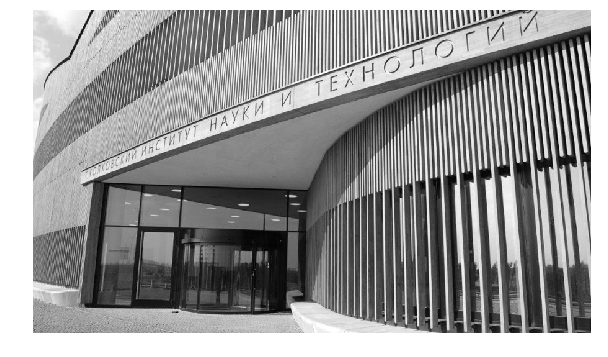

In [7]:
def show(x):
    plt.figure(figsize=(10, 10))
    plt.imshow(x, cmap='gray')
    plt.axis('off')
    
show(image)

In [8]:
sobel_y = np.array([
    [1, 2, 1],
    [0, 0 ,0],
    [-1, -2, -1],
])
sobel_x = sobel_y.T

In [9]:
%%time
result = convolve_nd(image, sobel_x)

CPU times: user 5.13 s, sys: 6.34 ms, total: 5.13 s
Wall time: 5.17 s


In [10]:
%%time
result = convolve(image, sobel_x)

CPU times: user 2.54 s, sys: 9.6 ms, total: 2.55 s
Wall time: 2.56 s


The more general function is slower, because we waste time while creating a tuple of slices

In [11]:
result = convolve_same(image, sobel_x)

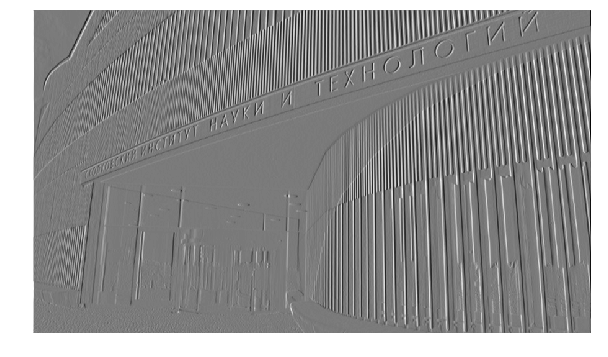

In [12]:
show(result)

### Comparing with scipy

In [13]:
from scipy.signal import convolve2d

In [14]:
%%time
result_sp = convolve2d(image, sobel_x, mode='same')

CPU times: user 18.4 ms, sys: 51 µs, total: 18.4 ms
Wall time: 20.1 ms


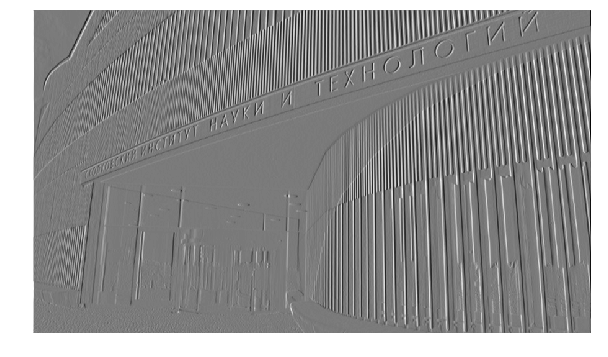

In [15]:
show(result_sp)

In [16]:
np.abs(result - result_sp).max()

8.881784197001252e-16

basically identical results:

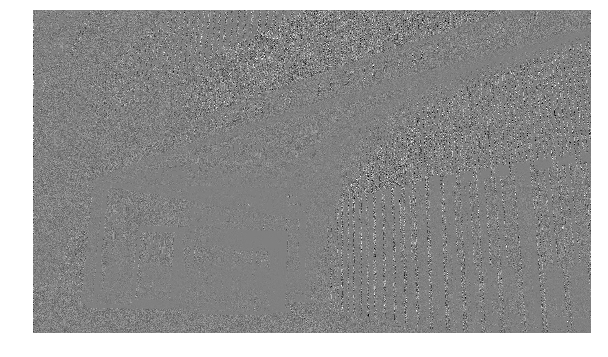

In [17]:
show(result - result_sp)

## A simple edge detector

In [18]:
res_x = convolve(image, sobel_x)
res_y = convolve(image, sobel_y)

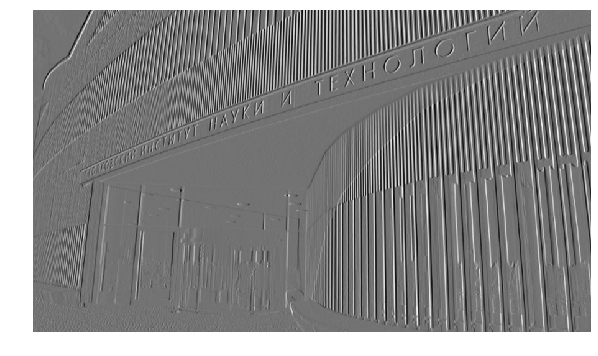

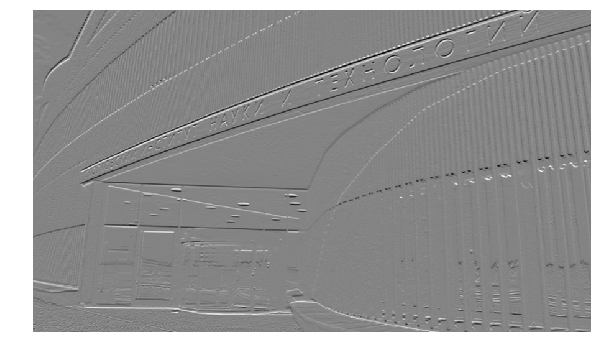

In [19]:
show(res_x)
show(res_y)

In [20]:
norm = np.hypot(res_x, res_y)

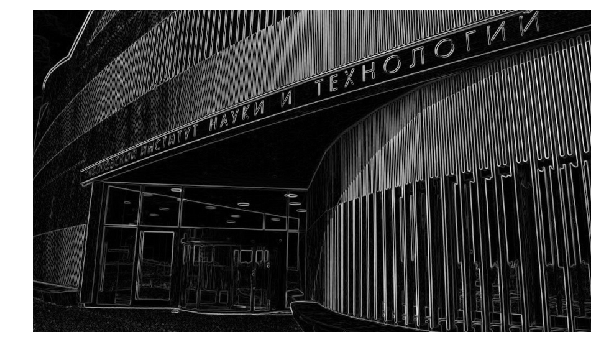

In [21]:
show(norm)